In [1]:
import sys
sys.path.append("..")

from TwinNeuralNetworkNearestNeighbors import TNNR_NN

import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

import gc

In [2]:
def_func = lambda a: lambda x: x**3 - a*x

In [3]:
n = 2100
seed = 23497

a = 70

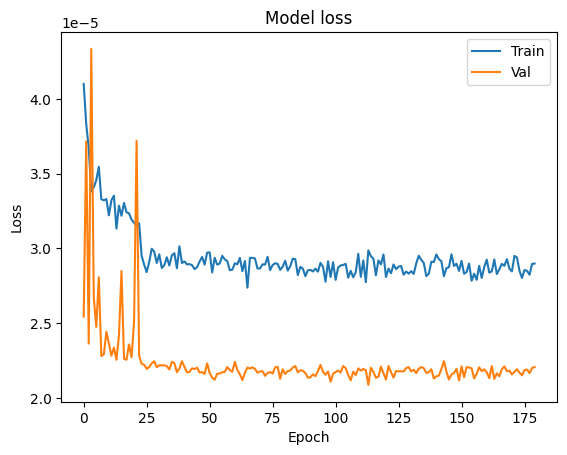

Test RMSE (plain):                                6.957672202246157
Test RMSE (back to y-space):                      2.1746099931918232
Test RMSE (min among clusters):                   3.4298823082405328
Test RMSE (transformed back):                     6.957672202246157
Test RMSE (min among clusters, transformed back): 3.429882308240533
CPU times: user 1h 34min 39s, sys: 1h 32min 17s, total: 3h 6min 57s
Wall time: 19min 53s


In [5]:
%%time

tnnr_nn_test_64_fnorm = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fnorm_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005)

In [6]:
gc.collect()

55177

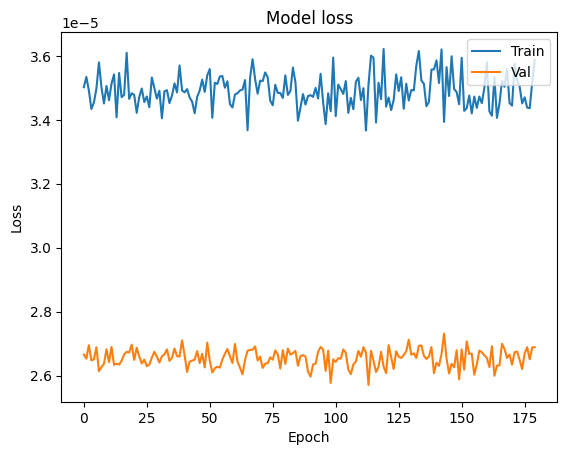

Test RMSE (plain):                                6.958454314332022
Test RMSE (back to y-space):                      4.999915550801994
Test RMSE (min among clusters):                   3.4296162053987262
Test RMSE (transformed back):                     6.958454314332022
Test RMSE (min among clusters, transformed back): 3.4296162053987267
CPU times: user 1h 37min 4s, sys: 1h 31min 5s, total: 3h 8min 10s
Wall time: 19min 45s


In [7]:
%%time

tnnr_nn_test_64_fzero = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fzero_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                zero_F_training=True)

In [8]:
4.994553079885733-2.1244640489891333

2.8700890308966

In [9]:
gc.collect()

55954

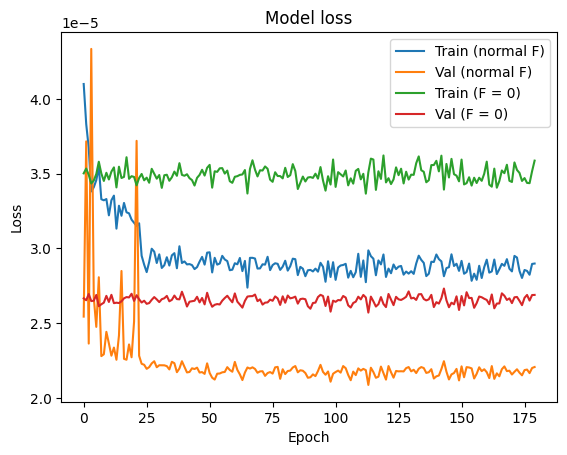

In [10]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

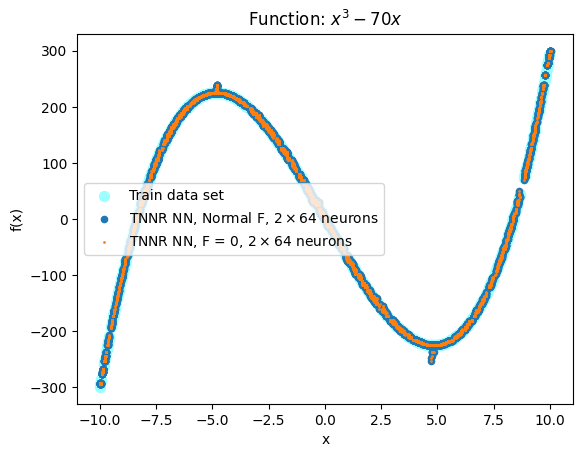

In [11]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=50, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=20)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=6)

In [12]:
gc.collect()

2262

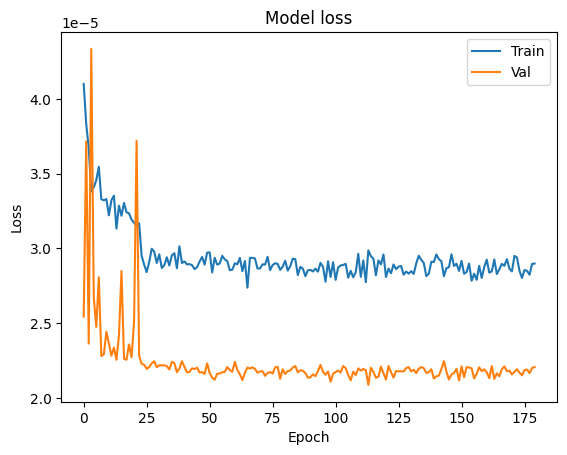

Test RMSE (plain):              5.170652059326769
Test RMSE (back to y-space):    76.02796682273234
CPU times: user 4min 3s, sys: 39.7 s, total: 4min 43s
Wall time: 3min 15s


In [13]:
%%time

tnnr_nn_test_64_no_nn = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                no_use_nn=True)

In [14]:
gc.collect()

15550

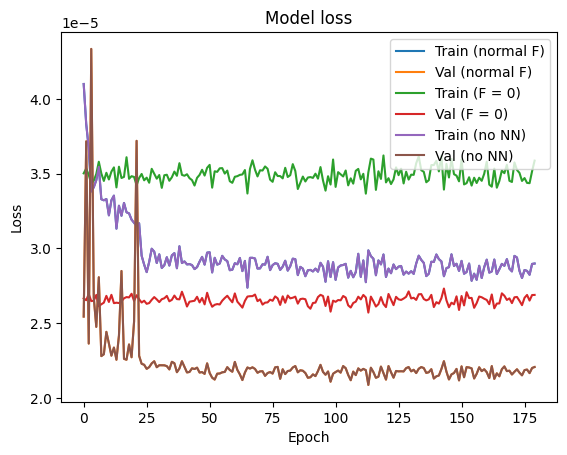

In [15]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.plot(tnnr_nn_test_64_no_nn.train_history.history['loss'], label='Train (no NN)')
plt.plot(tnnr_nn_test_64_no_nn.train_history.history['val_loss'], label='Val (no NN)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

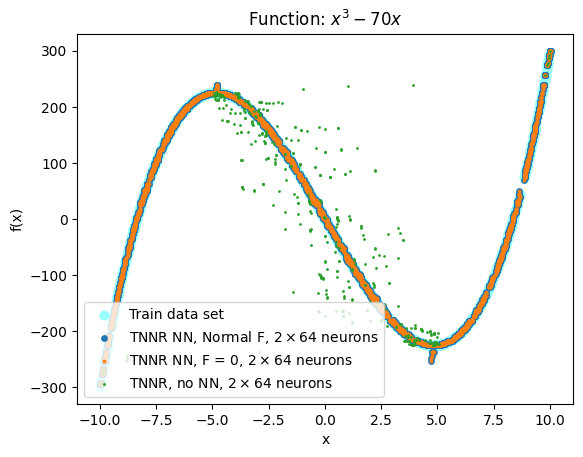

In [16]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=40, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=15)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=3)
plt.scatter(tnnr_nn_test_64_no_nn.x_pred_test,
            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_test_single),
            label='TNNR, no NN, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [17]:
gc.collect()

2686

--------------

In [18]:
a = -70

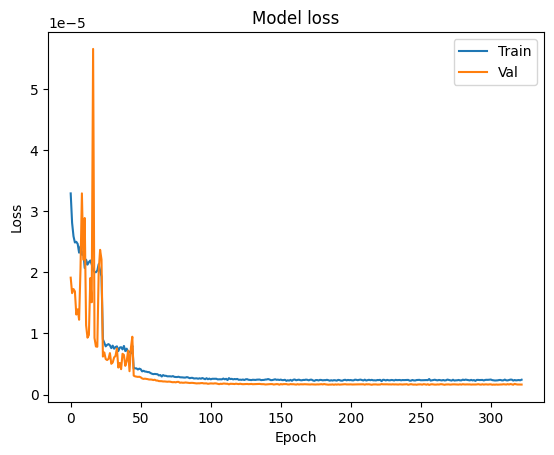

Test RMSE (plain):                                0.02045442485964424
Test RMSE (back to y-space):                      2.1332820139470345
Test RMSE (min among clusters):                   0.0033671293388377677
Test RMSE (transformed back):                     0.02045442485964424
Test RMSE (min among clusters, transformed back): 0.0033671293388377738
CPU times: user 1h 40min 29s, sys: 1h 29min 59s, total: 3h 10min 29s
Wall time: 21min 33s


In [19]:
%%time

tnnr_nn_test_64_fnorm = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fnorm_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005)

In [20]:
gc.collect()

52858

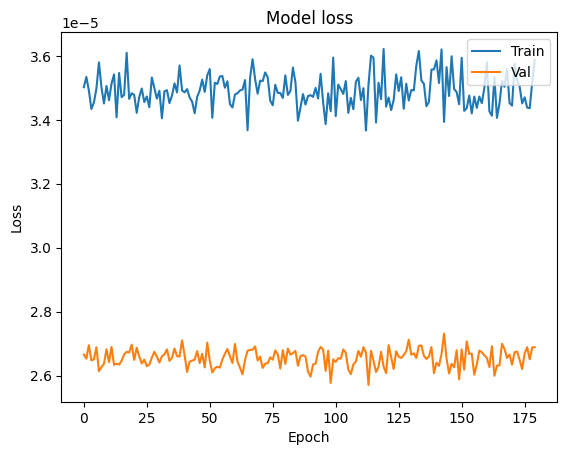

Test RMSE (plain):                                0.07908028765773037
Test RMSE (back to y-space):                      16.109846852420265
Test RMSE (min among clusters):                   0.014411761308783314
Test RMSE (transformed back):                     0.0790802876577304
Test RMSE (min among clusters, transformed back): 0.01441176130878331
CPU times: user 1h 32min 53s, sys: 1h 32min 44s, total: 3h 5min 38s
Wall time: 20min 17s


In [21]:
%%time

tnnr_nn_test_64_fzero = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fzero_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                zero_F_training=True)

In [22]:
2.1281749113650124-16.101112303328367

-13.972937391963356

In [23]:
gc.collect()

87823

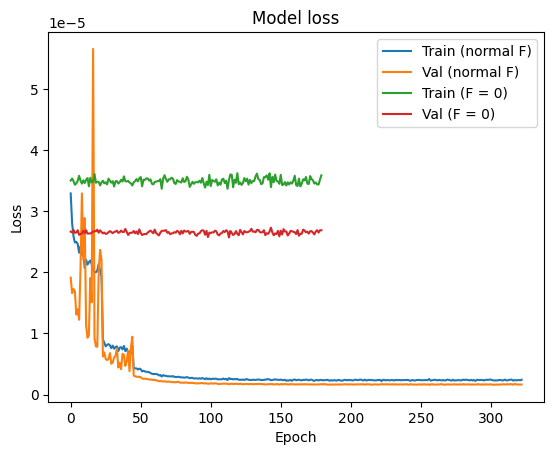

In [24]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

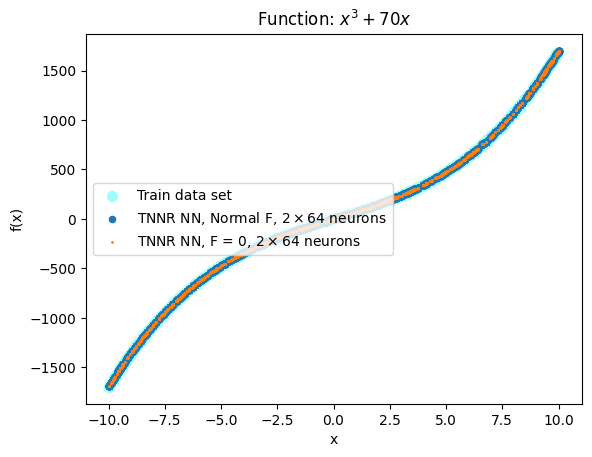

In [25]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=50, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=20)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 + 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=6)

In [26]:
gc.collect()

1433

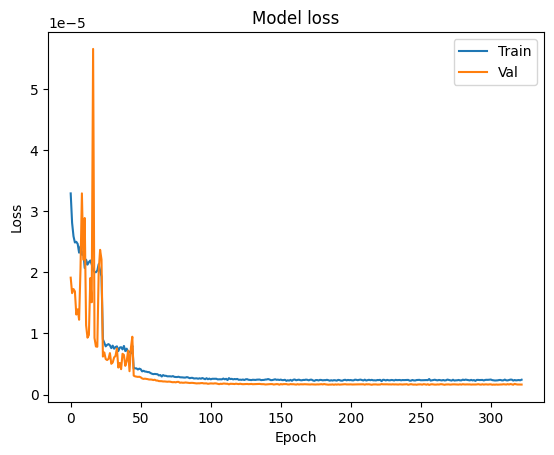

Test RMSE (plain):              0.005916801509278554
Test RMSE (back to y-space):    0.8701807268499395
CPU times: user 7min 25s, sys: 1min 21s, total: 8min 47s
Wall time: 6min


In [27]:
%%time

tnnr_nn_test_64_no_nn = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                no_use_nn=True)

In [28]:
gc.collect()

6226

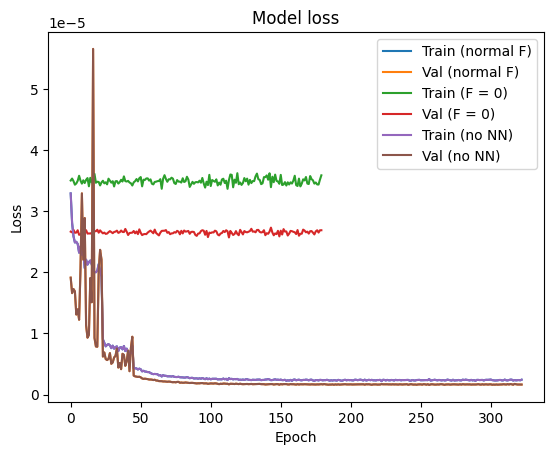

In [29]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.plot(tnnr_nn_test_64_no_nn.train_history.history['loss'], label='Train (no NN)')
plt.plot(tnnr_nn_test_64_no_nn.train_history.history['val_loss'], label='Val (no NN)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

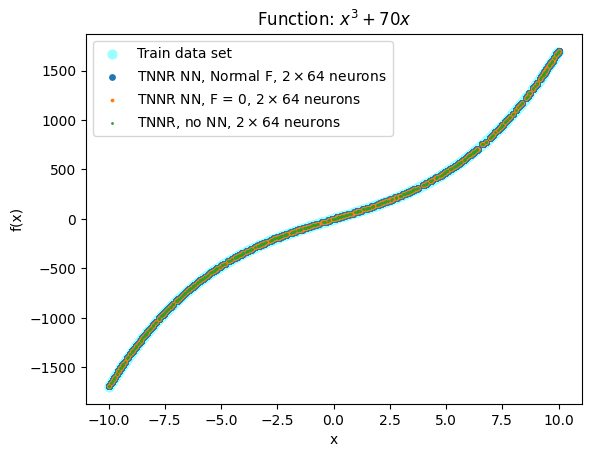

In [30]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=40, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=15)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=3)
plt.scatter(tnnr_nn_test_64_no_nn.x_pred_test,
            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_test_single),
            label='TNNR, no NN, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 + 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [31]:
gc.collect()

2686